In [11]:
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit.circuit.library import GroverOperator
from qiskit.utils import QuantumInstance
from qiskit.circuit import QuantumRegister, ClassicalRegister
import random

Базы Алисы: [1, 1, 1, 0, 0, 0, 0, 0, 1, 0]
Базы Боба: [0, 1, 0, 0, 1, 1, 0, 0, 1, 0]
Результаты измерений: ['1', '0', '1', '1', '0', '1', '1', '1', '0', '1']
Совпадающие биты: ['0', '1', '1', '1', '0', '1']


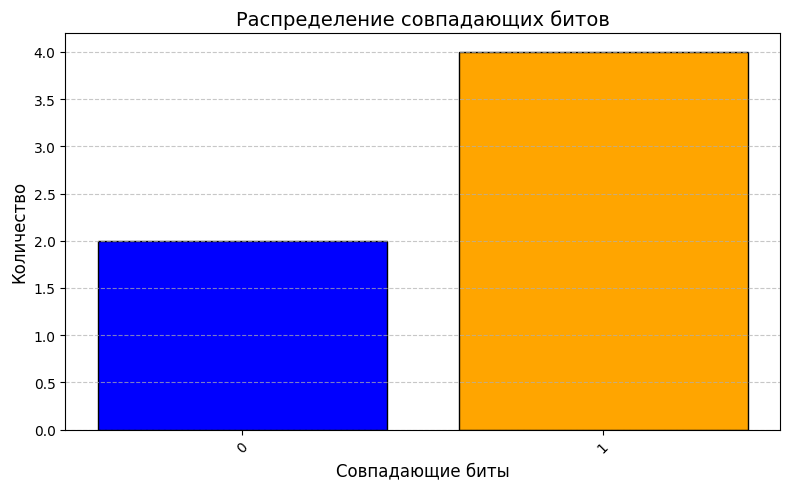

In [12]:
# Генерация случайного ключа
def generate_key(length):
    return [random.choice([0, 1]) for _ in range(length)]

# Случайные базы для Алисы и Боба
alice_bases = generate_key(10)
bob_bases = generate_key(10)

# Генерация квантовой цепи и результатов измерений
key_bits = generate_key(10)
results = []

# Создаем квантовую цепь для каждого бита ключа
for i in range(10):
    qc = QuantumCircuit(1, 1)  # Создаем квантовую цепь с 1 кубитом и 1 классическим битом
    # Применяем операции в зависимости от баз и ключа
    if alice_bases[i] == 1:
        qc.h(0)  # Применяем Hadamard, если база Алисы равна 1
    if key_bits[i] == 1:
        qc.x(0)  # Устанавливаем кубит в |1⟩, если бит ключа равен 1
    # Боб измеряет кубит в зависимости от своей базы
    if bob_bases[i] == 1:
        qc.h(0)  # Применяем Hadamard, если база Боба равна 1
    qc.measure(0, 0)  # Измеряем кубит

    # Выполняем на симуляторе
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(qc, simulator, shots=1)  # Выполняем симуляцию 1 раз
    result = job.result()
    counts = result.get_counts(qc)
    results.append(list(counts.keys())[0])  # Сохраняем результат измерения

# Проверка совпадений базисов
matched_bits = []
for i in range(10):
    if alice_bases[i] == bob_bases[i]:  # Сравниваем базы
        matched_bits.append(results[i])  # Добавляем результат, если базы совпадают

# Выводим результаты
print("Базы Алисы:", alice_bases)
print("Базы Боба:", bob_bases)
print("Результаты измерений:", results)
print("Совпадающие биты:", matched_bits)

# Построение гистограммы с использованием plt.bar
counts_dict = {key: matched_bits.count(key) for key in set(matched_bits)}
labels = list(counts_dict.keys())
values = list(counts_dict.values())

plt.figure(figsize=(8, 5))  # Устанавливаем размер фигуры для лучшей визуализации
plt.bar(labels, values, color=['blue', 'orange'], edgecolor='black')
plt.xlabel('Совпадающие биты', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.title('Распределение совпадающих битов', fontsize=14)
plt.xticks(rotation=45)  # Поворачиваем метки по оси X для лучшей читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Добавляем сетку для лучшего восприятия
plt.tight_layout()  # Упаковываем элементы графика
plt.show()
